In [20]:
import pandas as pd

from correlation_matrix import get_correlation_matrix
from correlation_matrix import (
    plot_correlation_matrix, plot_dendrogram, cluster_correlation_matrix,
    visualize_network
)

file_path = "vl_concepts/celebahq256_clip_laion5b_celeba.csv"
df = pd.read_csv(file_path)
numeric_df = df.drop(columns=["image_id"])

correlation_matrix = get_correlation_matrix(numeric_df)


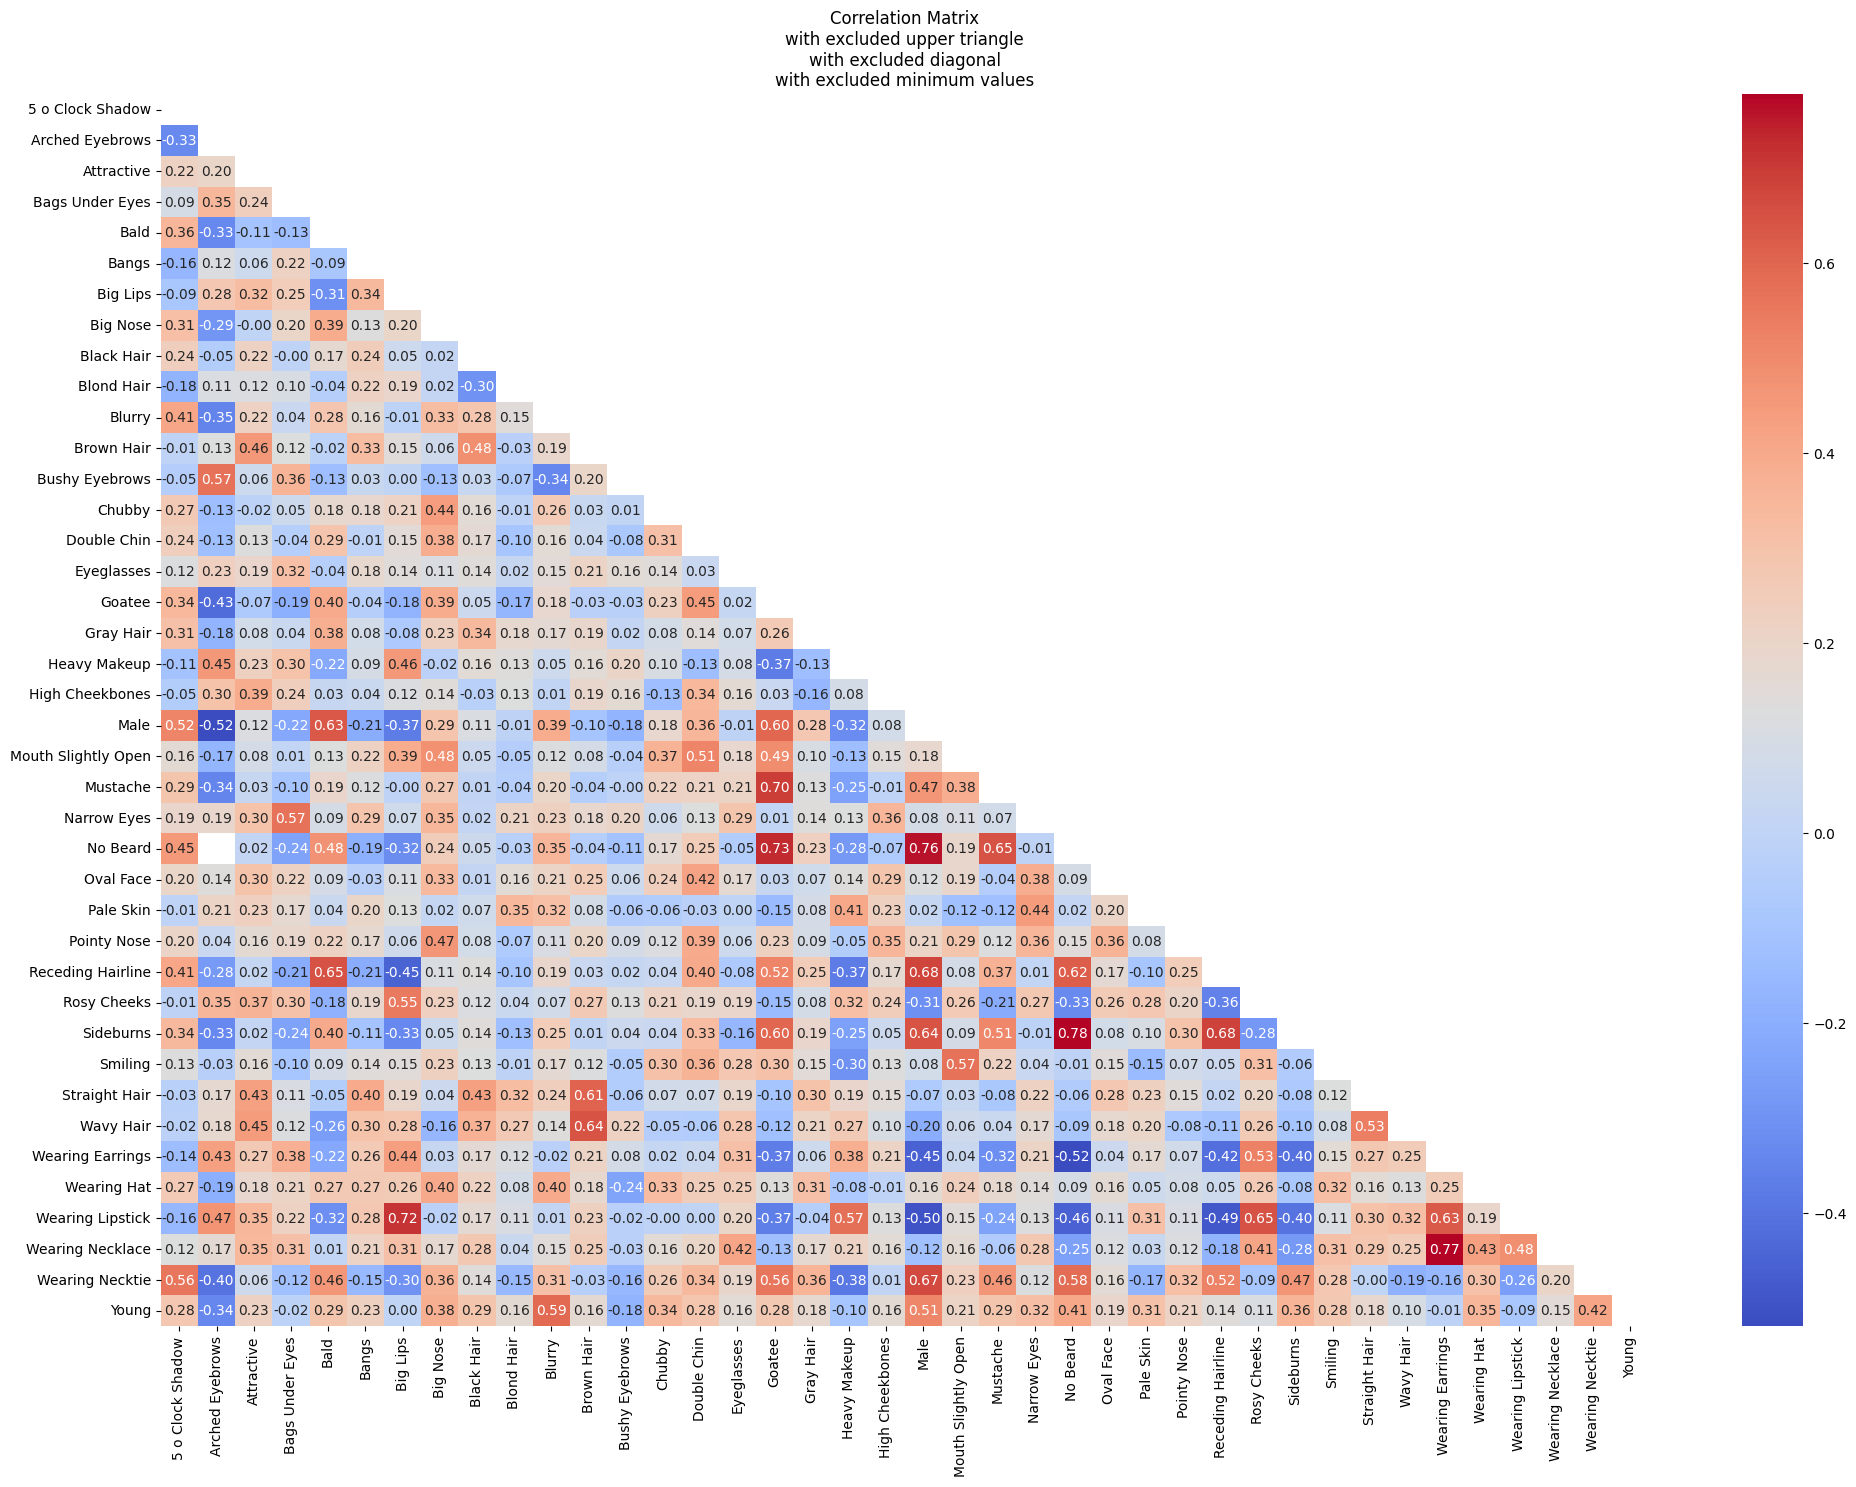

In [21]:
plot_correlation_matrix(correlation_matrix, (24, 16))


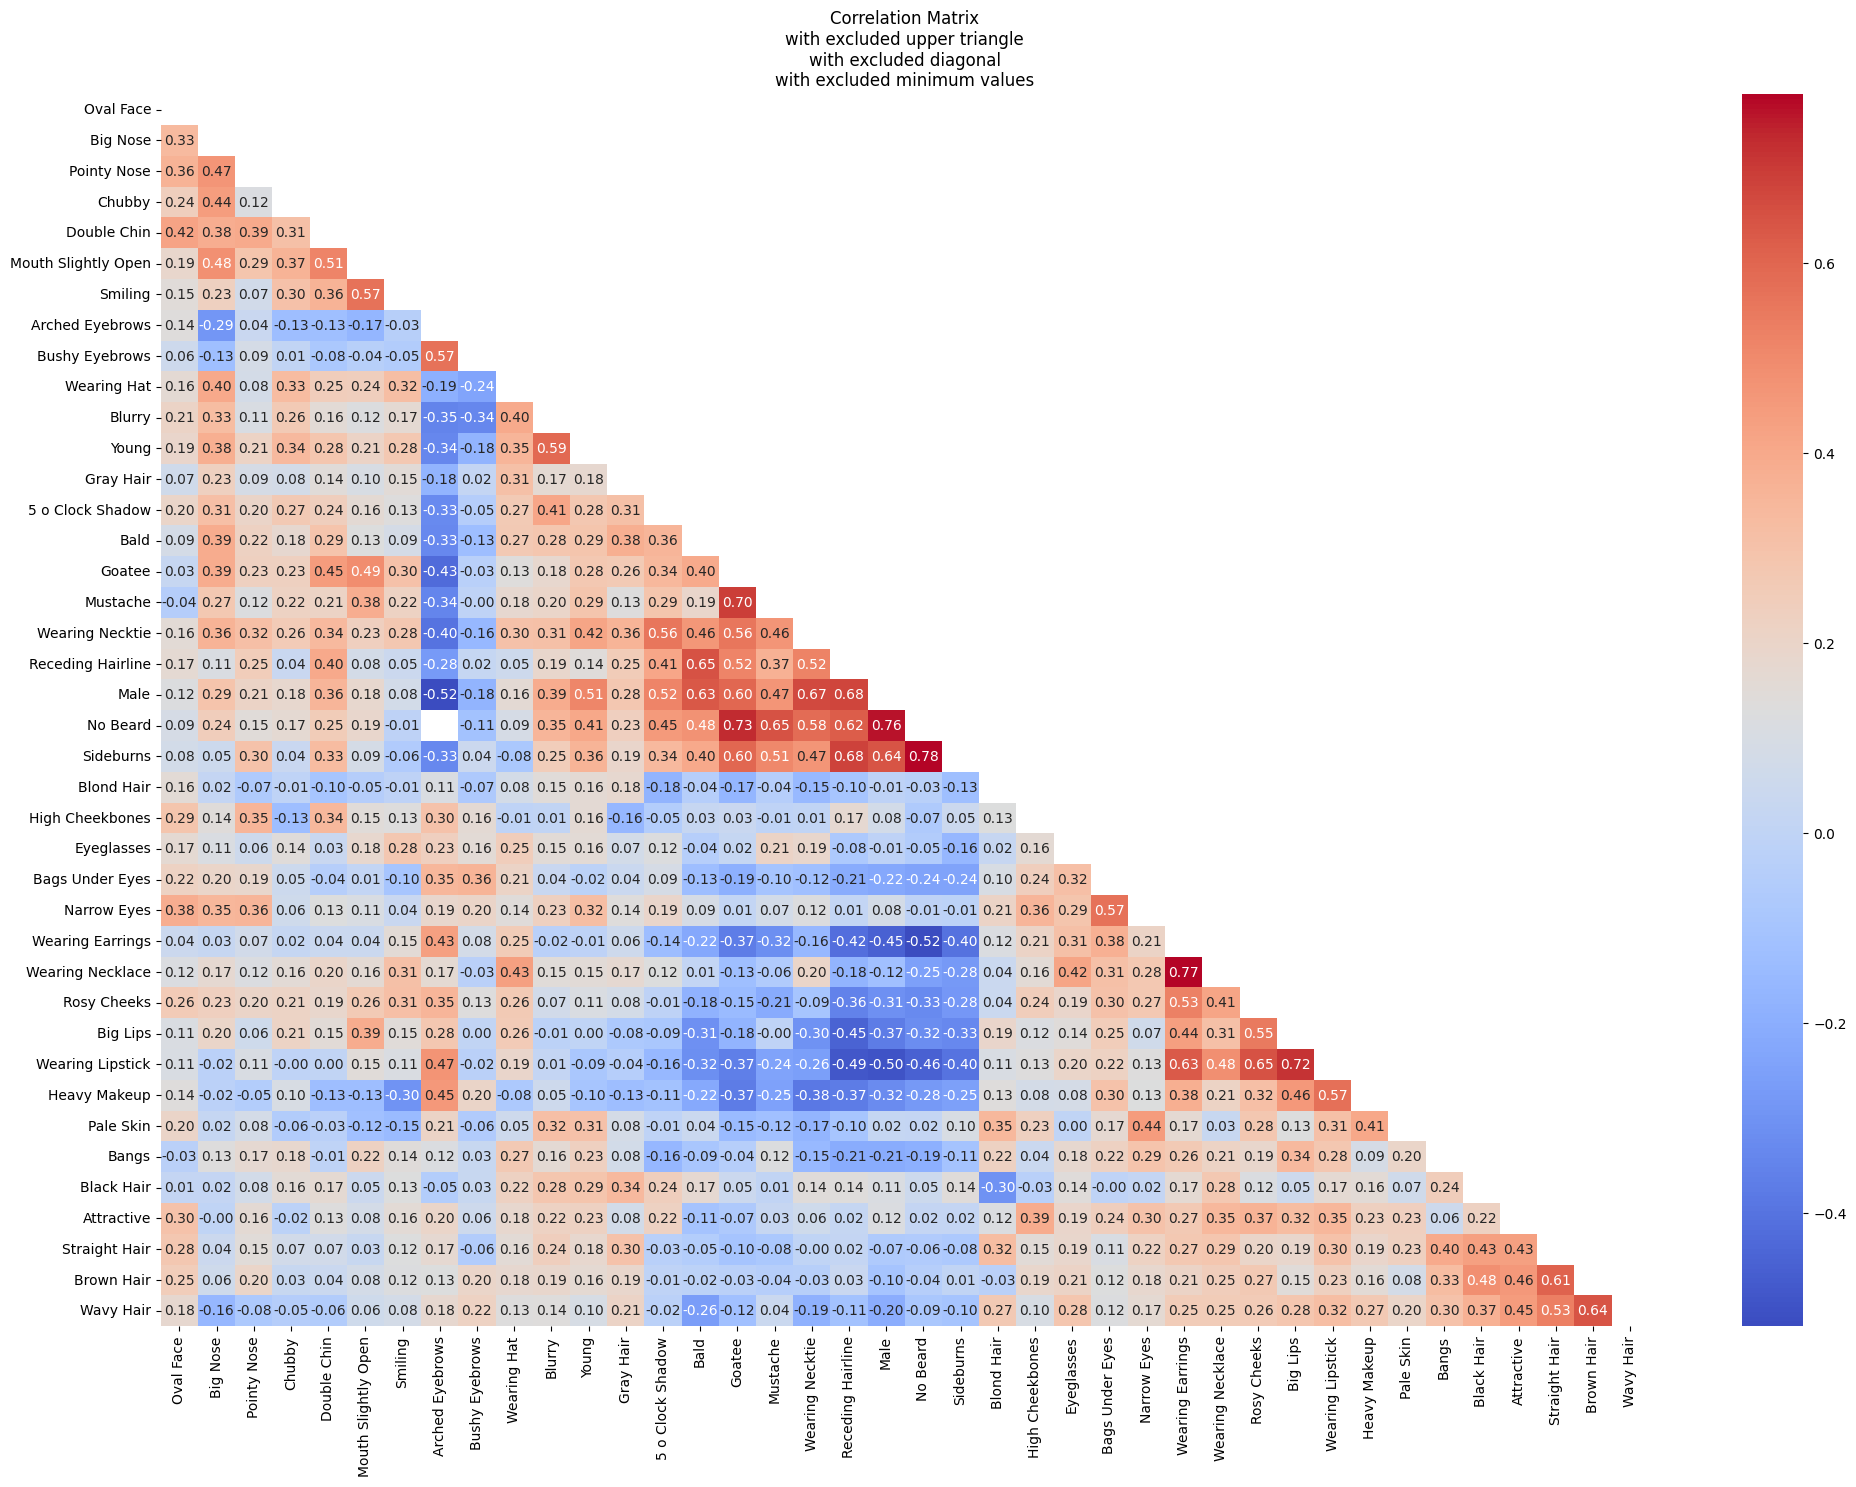

In [22]:
clustered_corr_matrix = cluster_correlation_matrix(correlation_matrix)

plot_correlation_matrix(clustered_corr_matrix, fig_size=(24, 16))


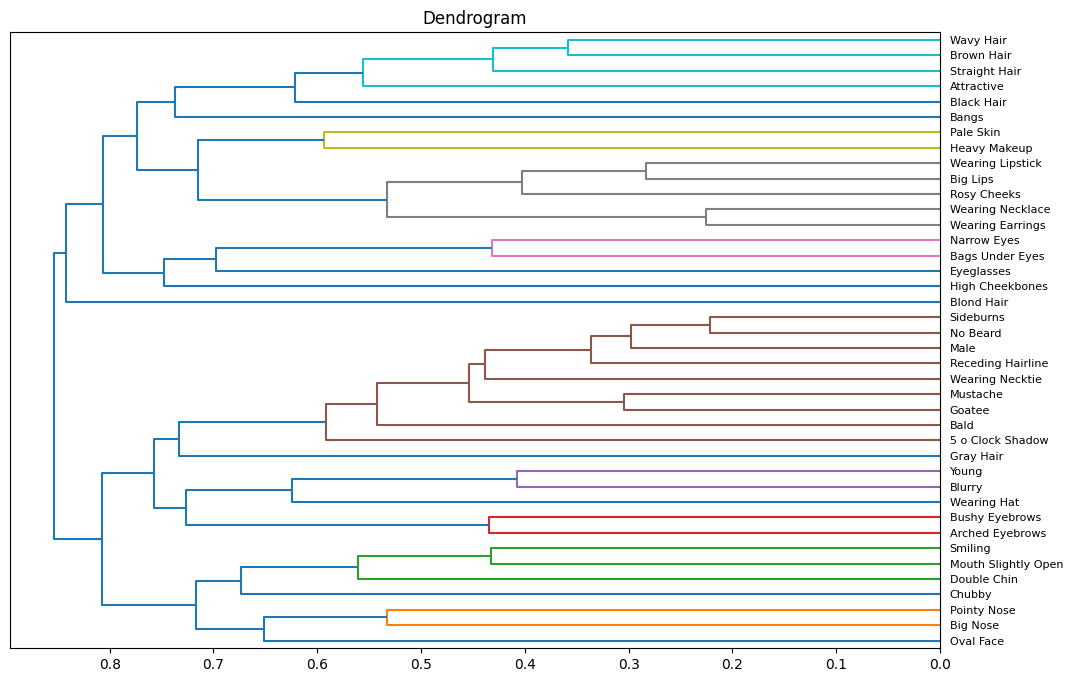

In [23]:
plot_dendrogram(correlation_matrix, fig_size=(12, 8))


In [24]:
# import numpy as np


# def select_top_categories(corr_matrix: pd.DataFrame, top_n: int) -> pd.DataFrame:
#     """
#     Wybiera top_n kategorii z macierzy korelacji na podstawie sumy absolutnych korelacji.
#     """
#     # Tworzymy kopię macierzy wartości bezwzględnych korelacji
#     corr_abs = corr_matrix.abs().copy()
#     # Wyzeruj diagonalę, żeby nie liczyć korelacji danej zmiennej z samą sobą
#     np.fill_diagonal(corr_abs.values, 0)
#     # Obliczamy "ważność" każdej kategorii jako sumę korelacji z innymi
#     importance = corr_abs.sum(axis=1)
#     # Wybieramy indeksy top_n kategorii
#     top_categories = importance.nlargest(top_n).index
#     # Zwracamy wyciętą macierz korelacji
#     return corr_matrix.loc[top_categories, top_categories]


# correlation_matrix_limited = select_top_categories(correlation_matrix, 100)

name = f"""correlation_networks/{file_path.split("/")[-1].split(".")[0]}.html"""
communities = visualize_network(correlation_matrix, name, 0.7)
for i, family in enumerate(communities):
    print(i, family)


0 frozenset({'Male', 'Goatee', 'Sideburns', 'No Beard'})
1 frozenset({'Big Lips', 'Wearing Lipstick'})
2 frozenset({'Wearing Earrings', 'Wearing Necklace'})
